In [2]:
# Hande missing vale
import pandas as pd
import numpy as np

df = pd.read_csv("titanic.csv")


In [3]:

print("Missing values in each column before handling:")

Missing values in each column before handling:


In [4]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
#Drop columns with too many missing values
df_dropped_cols = df.drop('Cabin', axis=1)

print("\nDataFrame after dropping 'Cabin' column:")
print(df_dropped_cols.head(10))



DataFrame after dropping 'Cabin' column:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                     

In [6]:
# Impute missing values with the median
df_median = df_dropped_cols  
df_median['Age'].fillna(df_median['Age'].median(), inplace=True)

print("\nDataFrame after imputing numerical column 'Age' with median:")
print(df_median.head(50))


DataFrame after imputing numerical column 'Age' with median:
    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           

/tmp/ipykernel_92431/3838280953.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_median['Age'].fillna(df_median['Age'].median(), inplace=True)


In [7]:
# Impute missing values with the mode
df_mode = df_median.copy()  
df_mode['Embarked'].fillna(df_mode['Embarked'].mode()[0], inplace=True)

print("\nDataFrame after imputing categorical column 'Embarked' with mode:")
print(df_mode.head(50))


DataFrame after imputing categorical column 'Embarked' with mode:
    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24      

/tmp/ipykernel_92431/268577798.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mode['Embarked'].fillna(df_mode['Embarked'].mode()[0], inplace=True)


In [ ]:
#Handle categorical value


In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv("titanic.csv")

##Fill categorical missing values with mode

In [9]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna("Unknown")

##Label Encoding

In [10]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

print("After Label Encoding (Sex):")
print(df[['Sex']].head())


After Label Encoding (Sex):
   Sex
0    1
1    0
2    0
3    0
4    1


#One Hot Encoding

#Here onehot encoding is applied to 'Embarked' and 'Pclass'

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), ['Embarked', 'Pclass'])
    ],
    remainder='passthrough'
)

# Apply transformation
transformed_data = preprocessor.fit_transform(df)

# Convert to DataFrame
feature_names = preprocessor.get_feature_names_out()
df_encoded = pd.DataFrame(transformed_data, columns=feature_names)

print("\nAfter One Hot Encoding:")
print(df_encoded.head())


After One Hot Encoding:
  onehot__Embarked_Q onehot__Embarked_S onehot__Pclass_2 onehot__Pclass_3  \
0                0.0                1.0              0.0              1.0   
1                0.0                0.0              0.0              0.0   
2                0.0                1.0              0.0              1.0   
3                0.0                1.0              0.0              0.0   
4                0.0                1.0              0.0              1.0   

  remainder__PassengerId remainder__Survived  \
0                      1                   0   
1                      2                   1   
2                      3                   1   
3                      4                   1   
4                      5                   0   

                                     remainder__Name remainder__Sex  \
0                            Braund, Mr. Owen Harris              1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...              0   
2         

#Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
df = pd.read_csv("titanic.csv")

#Handling missing value first

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

#Select Numerical Columns

In [13]:
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']

X = df[numerical_cols]

print("Original Numerical Data:\n", X.head())

Original Numerical Data:
     Age     Fare  SibSp  Parch  Pclass
0  22.0   7.2500      1      0       3
1  38.0  71.2833      1      0       1
2  26.0   7.9250      0      0       3
3  35.0  53.1000      1      0       1
4  35.0   8.0500      0      0       3


#Initialize Scalers

In [16]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
maxabs_scaler = MaxAbsScaler()


#Apply Scaling

In [17]:
df_standard = pd.DataFrame(
    standard_scaler.fit_transform(X),
    columns=numerical_cols
)

df_minmax = pd.DataFrame(
    minmax_scaler.fit_transform(X),
    columns=numerical_cols
)

df_robust = pd.DataFrame(
    robust_scaler.fit_transform(X),
    columns=numerical_cols
)

df_maxabs = pd.DataFrame(
    maxabs_scaler.fit_transform(X),
    columns=numerical_cols
)

#Log Transformation (Optional – For Skewed Data like Fare)

In [18]:
df_log = X.copy()
df_log['Fare'] = np.log1p(df_log['Fare'])

# -----------------------------
# 6️⃣ Print Results
# -----------------------------
print("\nStandard Scaled Data:\n", df_standard.head())
print("\nMinMax Scaled Data:\n", df_minmax.head())
print("\nRobust Scaled Data:\n", df_robust.head())
print("\nMaxAbs Scaled Data:\n", df_maxabs.head())
print("\nLog Transformed Fare:\n", df_log.head())


Standard Scaled Data:
         Age      Fare     SibSp     Parch    Pclass
0 -0.565736 -0.502445  0.432793 -0.473674  0.827377
1  0.663861  0.786845  0.432793 -0.473674 -1.566107
2 -0.258337 -0.488854 -0.474545 -0.473674  0.827377
3  0.433312  0.420730  0.432793 -0.473674 -1.566107
4  0.433312 -0.486337 -0.474545 -0.473674  0.827377

MinMax Scaled Data:
         Age      Fare  SibSp  Parch  Pclass
0  0.271174  0.014151  0.125    0.0     1.0
1  0.472229  0.139136  0.125    0.0     0.0
2  0.321438  0.015469  0.000    0.0     1.0
3  0.434531  0.103644  0.125    0.0     0.0
4  0.434531  0.015713  0.000    0.0     1.0

Robust Scaled Data:
         Age      Fare  SibSp  Parch  Pclass
0 -0.461538 -0.312011    1.0    0.0     0.0
1  0.769231  2.461242    1.0    0.0    -2.0
2 -0.153846 -0.282777    0.0    0.0     0.0
3  0.538462  1.673732    1.0    0.0    -2.0
4  0.538462 -0.277363    0.0    0.0     0.0

MaxAbs Scaled Data:
       Age      Fare  SibSp  Parch    Pclass
0  0.2750  0.014151  0.125

#Handling Outliers

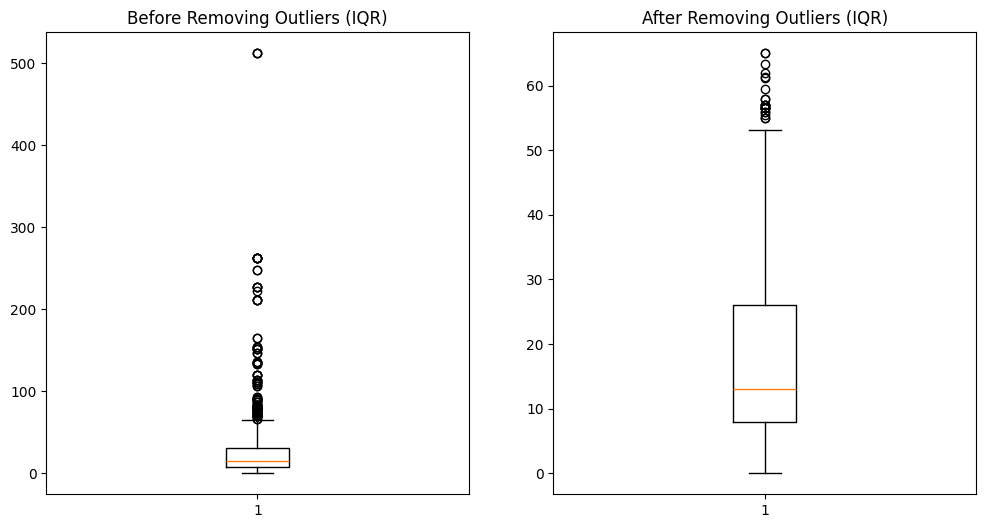

Data after removing outliers using IQR:
   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    male  22.0      1      0   
2                        Heikkinen, Miss. Laina  female  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. William Henry    male  35.0      0      0   
5                              Moran, Mr. James    male  28.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  
5            330877   8.4583   NaN    

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("titanic.csv")

# Handle missing values first
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Select column for outlier removal (Fare has strong outliers)
column = 'Fare'

# Calculate Q1, Q3 and IQR
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Plot before and after
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.boxplot(df[column])
ax1.set_title("Before Removing Outliers (IQR)")

ax2.boxplot(df_filtered[column])
ax2.set_title("After Removing Outliers (IQR)")

plt.show()

print("Data after removing outliers using IQR:")
print(df_filtered.head())

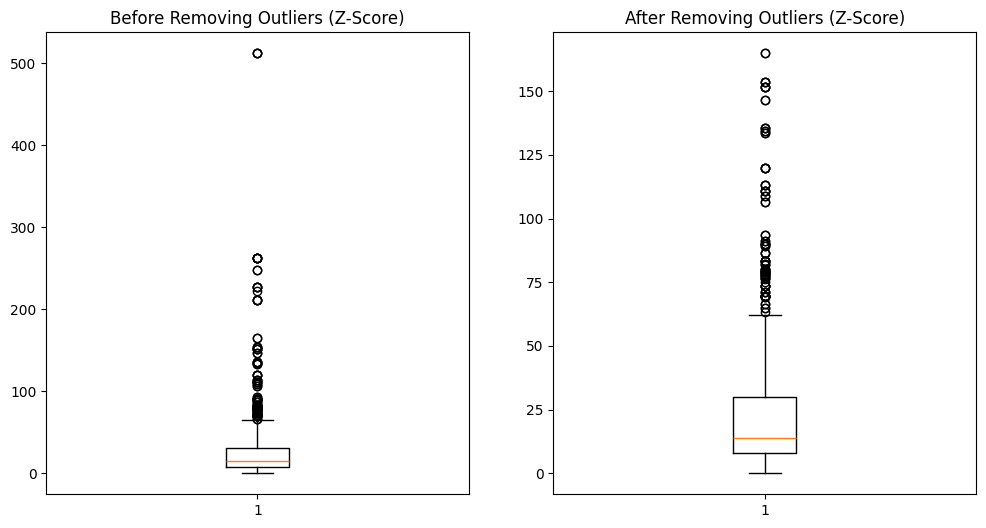

Data after removing outliers using Z-score:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0   

In [20]:
from sklearn.preprocessing import StandardScaler

# Reshape data for scaling
data_reshaped = df[['Fare']].values  

# Apply StandardScaler
scaler = StandardScaler()
z_scores = scaler.fit_transform(data_reshaped)

# Define threshold
threshold = 3   # Commonly 3 (your teacher used 1.5 in example)

# Remove outliers
df_filtered_z = df[np.abs(z_scores.flatten()) < threshold]

# Plot before and after
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.boxplot(df['Fare'])
ax1.set_title("Before Removing Outliers (Z-Score)")

ax2.boxplot(df_filtered_z['Fare'])
ax2.set_title("After Removing Outliers (Z-Score)")

plt.show()

print("Data after removing outliers using Z-score:")
print(df_filtered_z.head())

#Prepare Dataset

In [21]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("titanic.csv")

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Drop unnecessary columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

print(df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True


#Correlation Heatmap

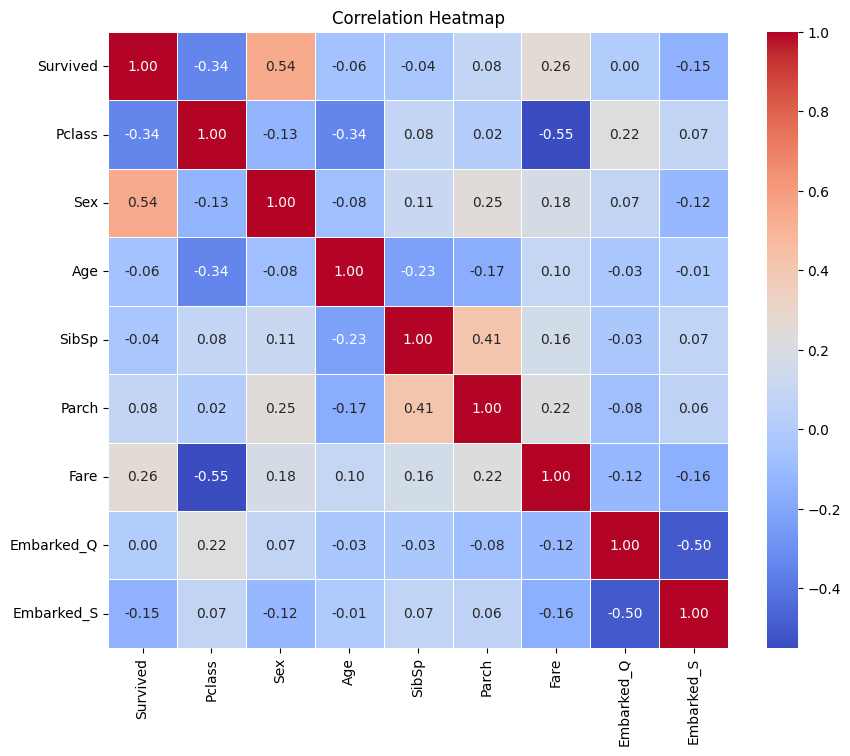

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#Remove Highly Correlated Features

In [23]:
corr_threshold = 0.9

to_drop = []
for column in corr_matrix.columns:
    if any(abs(corr_matrix[column]) > corr_threshold) and column != 'Survived':
        to_drop.append(column)

print("Highly correlated features to drop:", to_drop)

df_reduced = df.drop(columns=to_drop)

Highly correlated features to drop: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']


#Lasso Feature Selection

In [25]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("titanic.csv")

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Drop unnecessary columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Convert all columns to numeric (VERY IMPORTANT)
df = df.apply(pd.to_numeric)

print(df.dtypes)

Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_Q       bool
Embarked_S       bool
dtype: object


In [26]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [27]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scale features before Lasso (IMPORTANT)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# LassoCV model
lasso = LassoCV(cv=5, random_state=42)

lasso.fit(X_train, y_train)

print("Best alpha:", lasso.alpha_)

# Get selected features
selected_features = X.columns[lasso.coef_ != 0]

print("Selected features:", selected_features)

Best alpha: 0.0042538848505506615
Selected features: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_S'], dtype='object')


#Principle Component Analysis(PCA)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("titanic.csv")

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Drop unnecessary columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Separate features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle any remaining NaNs (if needed)
imputer = SimpleImputer(strategy="mean")
X_scaled = imputer.fit_transform(X_scaled)

#PCA Analysis

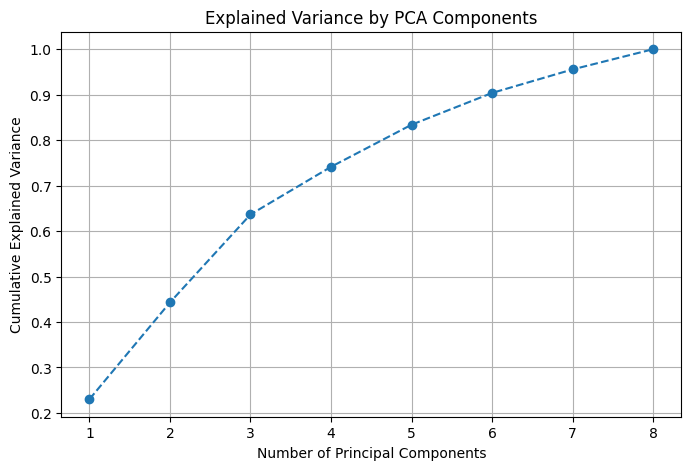

Optimal number of PCA components: 7


In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA without specifying number of components
pca = PCA()
pca.fit(X_scaled)

# Cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid()
plt.show()

# Find number of components explaining at least 95% variance
optimal_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of PCA components: {optimal_components}")

#Apply PCA with Optimal Components

In [29]:
# Apply PCA with selected components
pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(optimal_components)])

print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -1.037619 -0.630842  0.845315 -0.452286 -0.307175 -0.403360  0.026978
1  1.846926  1.060065 -1.313346  0.435813 -0.184400 -0.830367 -1.138574
2 -0.549054 -0.383340  0.279483  1.668021 -0.072761 -0.370960  0.068780
3  1.537154  0.661771  0.272677  0.961821  0.066480 -1.170294  0.204887
4 -1.167138  0.361801  0.856101 -0.125964  0.283838  0.119676  0.088014
